In [1]:
import pandas as pd 

data = pd.read_csv('../Data/data_tm_final.csv', index_col=False)

In [165]:
data

,fecha,fechaHoraLecturaDato,NombreParada,nombre_ruta,numero_estacion,latitud_parada,longitud_parada,latitud_parada0,longitud_parada0,latitud_parada25,longitud_parada25,latitud_parada50,longitud_parada50,latitud_parada75,longitud_parada75,latitud_parada100,longitud_parada100,estimacionOcupacionAbordo
0,2023-10-23,08:33:21,21 Ángeles,7 Portal Suba,23.0,4.735434,-74.080854,4.601667,-74.102611,4.637119,-74.079321,4.680501,-74.064704,4.711930,-74.072282,4.746815,-74.094279,16
1,2023-10-23,19:42:59,21 Ángeles,7 Portal Suba,23.0,4.735434,-74.080854,4.601667,-74.102611,4.637119,-74.079321,4.680501,-74.064704,4.711930,-74.072282,4.746815,-74.094279,42
2,2023-10-23,12:09:07,21 Ángeles,7 Portal Suba,23.0,4.735434,-74.080854,4.601667,-74.102611,4.637119,-74.079321,4.680501,-74.064704,4.711930,-74.072282,4.746815,-74.094279,0
3,2023-10-23,17:59:04,21 Ángeles,7 Portal Suba,23.0,4.735434,-74.080854,4.601667,-74.102611,4.637119,-74.079321,4.680501,-74.064704,4.711930,-74.072282,4.746815,-74.094279,160
4,2023-10-23,18:26:25,21 Ángeles,7 Portal Suba,23.0,4.735434,-74.080854,4.601667,-74.102611,4.637119,-74.079321,4.680501,-74.064704,4.711930,-74.072282,4.746815,-74.094279,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170897,2023-10-27,20:57:18,Zona Industrial,F32 Portal Américas,6.0,4.620322,-74.098689,4.670156,-74.071310,4.657291,-74.077663,4.620322,-74.098689,4.631301,-74.145769,4.629381,-74.173058,81
170898,2023-10-27,14:29:38,Zona Industrial,F32 Portal Américas,6.0,4.620322,-74.098689,4.670156,-74.071310,4.657291,-74.077663,4.620322,-74.098689,4.631301,-74.145769,4.629381,-74.173058,149
170899,2023-10-27,10:43:36,Zona Industrial,F32 Portal Américas,6.0,4.620322,-74.098689,4.670156,-74.071310,4.657291,-74.077663,4.620322,-74.098689,4.631301,-74.145769,4.629381,-74.173058,74
170900,2023-10-27,12:36:03,Zona Industrial,F32 Portal Américas,6.0,4.620322,-74.098689,4.670156,-74.071310,4.657291,-74.077663,4.620322,-74.098689,4.631301,-74.145769,4.629381,-74.173058,118


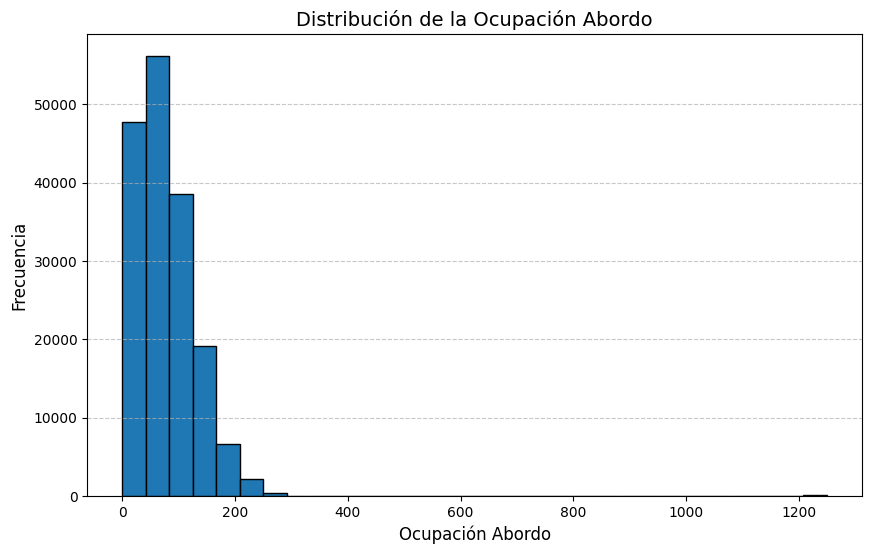

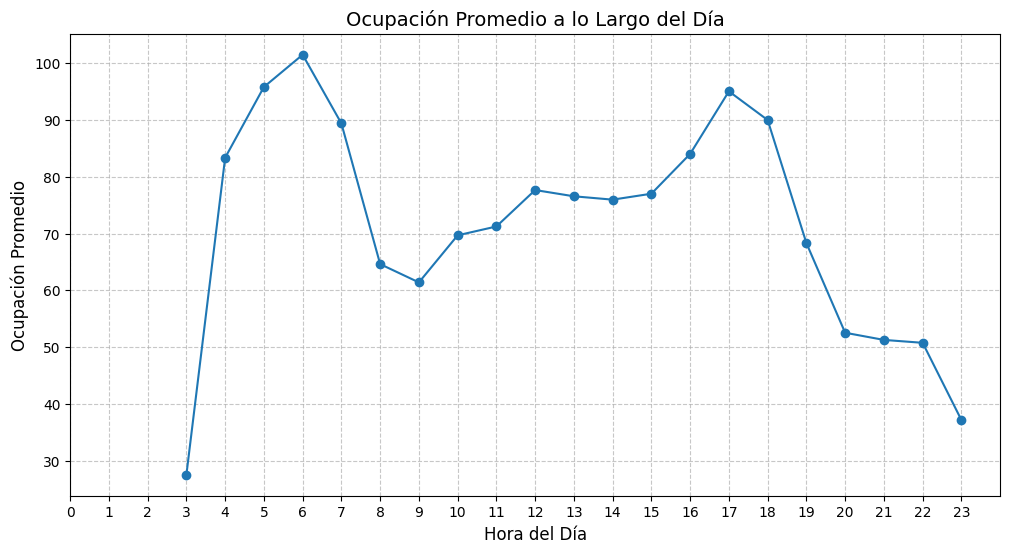

count    170902.000000
mean         77.177646
std          62.515238
min           0.000000
25%          38.000000
50%          69.000000
75%         107.000000
max        1250.000000
Name: estimacionOcupacionAbordo, dtype: float64

In [167]:
import matplotlib.pyplot as plt

# Convertir columnas de fecha y hora en formato datetime para análisis
data['fechaHoraLecturaDato'] = pd.to_datetime(data['fechaHoraLecturaDato'], format='%H:%M:%S')
data['hora'] = data['fechaHoraLecturaDato'].dt.hour  # Extraer la hora para análisis horario

# Resumen estadístico del campo de ocupación
ocupacion_summary = data['estimacionOcupacionAbordo'].describe()

# Distribución de la ocupación
plt.figure(figsize=(10, 6))
plt.hist(data['estimacionOcupacionAbordo'], bins=30, edgecolor='black')
plt.title('Distribución de la Ocupación Abordo', fontsize=14)
plt.xlabel('Ocupación Abordo', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Ocupación promedio por hora
ocupacion_horaria = data.groupby('hora')['estimacionOcupacionAbordo'].mean()

# Comportamiento horario
plt.figure(figsize=(12, 6))
plt.plot(ocupacion_horaria.index, ocupacion_horaria.values, marker='o')
plt.title('Ocupación Promedio a lo Largo del Día', fontsize=14)
plt.xlabel('Hora del Día', fontsize=12)
plt.ylabel('Ocupación Promedio', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.xticks(range(0, 24))
plt.show()

# Mostrar resumen estadístico
ocupacion_summary

In [168]:
import folium
import numpy as np

# Función para filtrar datos por franja horaria
def filtrar_por_franja(data, inicio, fin):
    return data[(data['hora'] >= inicio) & (data['hora'] < fin)]

# Función para crear un mapa de calor
def crear_mapa_calor(data, titulo):
    mapa = folium.Map(location=[data['latitud_parada'].mean(), data['longitud_parada'].mean()], zoom_start=12)
    for _, row in data.iterrows():
        folium.CircleMarker(
            location=(row['latitud_parada'], row['longitud_parada']),
            radius=5,
            color="red",
            fill=True,
            fill_opacity=0.7,
            popup=f"Ocupación: {row['estimacionOcupacionAbordo']}"
        ).add_to(mapa)
    return mapa

# Crear mapas por franjas horarias
franjas = {
    "4-7am": (4, 7),
    "8am-3pm": (8, 15),
    "3-6pm": (15, 18),
    "7-11pm": (19, 23)
}

mapas = {}
for franja, (inicio, fin) in franjas.items():
    datos_franja = filtrar_por_franja(data, inicio, fin)
    mapas[franja] = crear_mapa_calor(datos_franja, franja)

mapas


{'4-7am': <folium.folium.Map at 0x10fdb2610>,
 '8am-3pm': <folium.folium.Map at 0x108be0580>,
 '3-6pm': <folium.folium.Map at 0x1091b3940>,
 '7-11pm': <folium.folium.Map at 0x108d35820>}

In [177]:
import folium
from matplotlib import cm

# Crear una copia de los datos para trabajar con las franjas horarias
data['franja_horaria'] = pd.cut(data['hora'], 
                                bins=[0, 4, 8, 16, 18, 24], 
                                labels=['0-4am', '4-8am', '8am-4pm', '4-6pm', '6-11pm'],
                                right=False)

# Filtrar franjas horarias relevantes
franjas_interes = ['4-8am', '8am-4pm', '4-6pm', '6-11pm']
data_franjas = data[data['franja_horaria'].isin(franjas_interes)]

# Definir función para asignar colores por percentiles
def get_color(value, percentiles):
    if value <= percentiles[0]:
        return '#ff0000'  # Rojo (baja ocupación)
    elif value <= percentiles[1]:
        return '#ff8080'  # Rosa claro
    elif value <= percentiles[2]:
        return '#ffffff'  # Blanco (ocupación media)
    elif value <= percentiles[3]:
        return '#80ff80'  # Verde claro
    else:
        return '#006400'  # Verde (alta ocupación)

# Crear mapas por cada franja horaria
maps = {}
for franja in franjas_interes:
    franja_data = data_franjas[data_franjas['franja_horaria'] == franja]
    
    # Agrupar por parada y calcular ocupación promedio
    franja_grouped = franja_data.groupby(['NombreParada', 'latitud_parada', 'longitud_parada'])['estimacionOcupacionAbordo'].mean().reset_index()
    
    # Calcular percentiles para la ocupación promedio
    percentiles = franja_grouped['estimacionOcupacionAbordo'].quantile([0.2, 0.4, 0.6, 0.8]).values
    
    # Crear el mapa
    franja_map = folium.Map(location=[franja_grouped['latitud_parada'].mean(), franja_grouped['longitud_parada'].mean()], zoom_start=12)
    
    # Añadir puntos al mapa
    for _, row in franja_grouped.iterrows():
        color = get_color(row['estimacionOcupacionAbordo'], percentiles)
        
        folium.CircleMarker(
            location=[row['latitud_parada'], row['longitud_parada']],
            radius=8,
            color=color,
            fill=True,
            fill_opacity=0.7,
            popup=f"{row['NombreParada']}: {row['estimacionOcupacionAbordo']:.2f}"
        ).add_to(franja_map)
    
    maps[franja] = franja_map  # Guardar el mapa

# Mostrar mapas
for franja, mapa in maps.items():
    print(f"Mapa de la franja horaria: {franja}")
    display(mapa)

Mapa de la franja horaria: 4-8am


Mapa de la franja horaria: 8am-4pm


Mapa de la franja horaria: 4-6pm


Mapa de la franja horaria: 6-11pm


# Commute

In [178]:
maps['4-8am']

In [180]:
maps['4-6pm']

In [181]:
# Convertir 'fechaHoraLecturaDato' a datetime para extraer las horas si aún no se ha hecho
if 'hora' not in data.columns:
    data['fechaHoraLecturaDato'] = pd.to_datetime(data['fechaHoraLecturaDato'], format='%H:%M:%S', errors='coerce')
    data['hora'] = data['fechaHoraLecturaDato'].dt.hour

# Agrupar por 'hora', 'latitud_parada', y 'longitud_parada', y sumar la ocupación
grouped_data = data.groupby(['hora', 'latitud_parada', 'longitud_parada'], as_index=False)['estimacionOcupacionAbordo'].sum()

# Selección de columnas relevantes para la nueva matriz de correlación
correlation_columns_grouped = ['hora', 'latitud_parada', 'longitud_parada', 'estimacionOcupacionAbordo']
correlation_data_grouped = grouped_data[correlation_columns_grouped]

# Calcular la matriz de correlación
correlation_matrix_grouped = correlation_data_grouped.corr()

# Mantener solo la parte inferior de la matriz de correlación
mask_grouped = np.triu(np.ones_like(correlation_matrix_grouped, dtype=bool))
lower_triangle_matrix_grouped = correlation_matrix_grouped.mask(mask_grouped)

# Mostrar la matriz de correlación truncada
lower_triangle_matrix_grouped

,hora,latitud_parada,longitud_parada,estimacionOcupacionAbordo
hora,NaN,NaN,NaN,NaN
latitud_parada,0.021641,NaN,NaN,NaN
longitud_parada,0.030308,0.548026,NaN,NaN
estimacionOcupacionAbordo,-0.180671,-0.080463,0.130479,NaN
